## Load libs / Load turkish-se-SP500vsMSCI.csv  / Load mtcarsdata-4features.csv.csv dataset

In [35]:
import pandas as pd
import numpy as np
# import traceback
import matplotlib.pyplot as plt

import seaborn as sns
# import plotly.express as px
sns.set_palette("tab10")

In [36]:
# Linear regression model without intercept is regression model just with a starting point at (0,,0)
turkishStock = pd.read_csv("../src/turkish-se-SP500vsMSCI.csv", sep=',', names=['x1', 'x2'])
print("THIS IS THE TURKISH STOCK EXCHANGE")
turkishStock[:5]

THIS IS THE TURKISH STOCK EXCHANGE


,x1,x2
0,-0.004679,0.012698
1,0.007787,0.011341
2,-0.030469,-0.017073
3,0.003391,-0.005561
4,-0.021533,-0.010989


In [37]:
# lubu dubu
# mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv", sep=',', names=['x1', 'x2'])
mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv",engine= "python", sep=' ,')
mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv", )
print("THIS IS THE MTCarsData")
mtCarsData[:5]

THIS IS THE MTCarsData


,Model,mpg,disp,hp,weight
0,Mazda_RX4,21.0,160.0,110,2.620
1,Mazda_RX4Wag,21.0,160.0,110,2.875
2,Datsun_710,22.8,108.0,93,2.320
3,Hornet_4_Drive,21.4,258.0,110,3.215
4,Hornet_Sportabout,18.7,360.0,175,3.440


## Linear Regression without intercept (probabably)- standarized data


In [38]:
turkishStock_standarized = (turkishStock-turkishStock.mean())/turkishStock.std()
turkishStock_standarized[:5]

,x1,x2
0,-0.377679,0.941296
1,0.506880,0.836802
2,-2.207658,-1.350527
3,0.194996,-0.464321
4,-1.573588,-0.882155


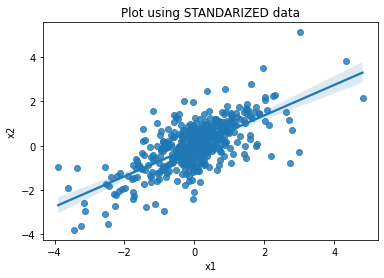

In [39]:
sns.regplot(data=turkishStock_standarized, x='x1', y='x2').set_title("Plot using STANDARIZED data")
plt.show()

## Using least squares solution to linear regression problem
$w = \frac {\sum \limits _{l=1} ^{N} x_{l} t_{l}} {\sum \limits _{l=1} ^{N} x^2_{l}}   $


--- w equals =  0.6339446342595815  ---


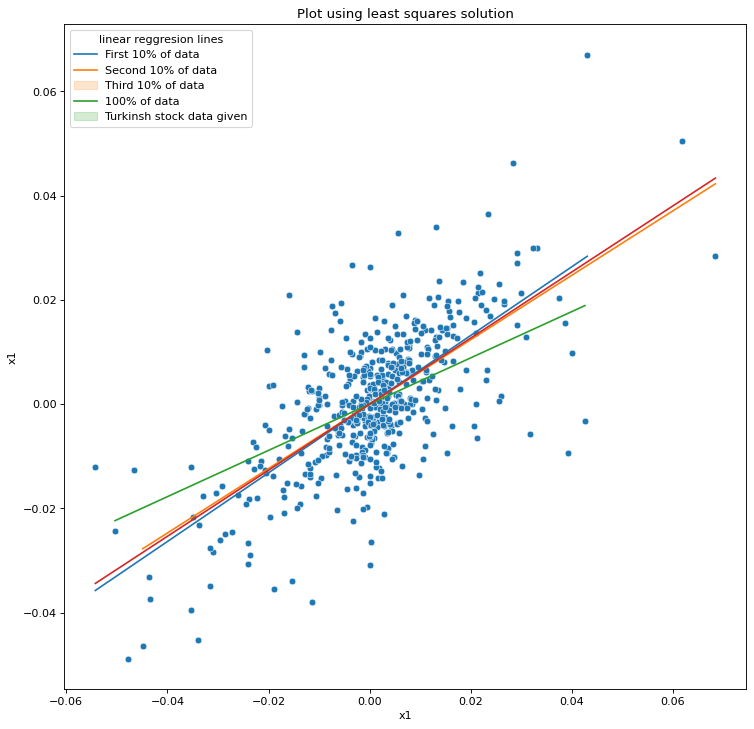

In [53]:
plt.figure(figsize= (11,11), dpi=80)
turkishStock_LinearOne = turkishStock
w = (turkishStock_LinearOne["x1"]*turkishStock_LinearOne["x2"])
w = w.sum() / (turkishStock_LinearOne["x1"]*turkishStock_LinearOne["x1"]).sum()
print("--- w equals = ", w, " ---")


# ff, aa = plt.subplots(1, 4, figsize=(30, 5))

for i in range(3):
    randomSubset1 = turkishStock_LinearOne.sample(frac=0.1)
    wSubset = (randomSubset1["x1"]*randomSubset1["x2"])
    wSubset = wSubset.sum()/(randomSubset1["x1"]**2).sum()
    sns.lineplot(
        y = randomSubset1["x1"]*wSubset,
        x = randomSubset1["x1"]
        )

sns.lineplot(
    y = turkishStock_LinearOne["x1"]*w,
    x = turkishStock_LinearOne["x1"]
    )
sns.scatterplot(
    data = turkishStock_LinearOne, x = "x1",
    y = "x2").set_title("Plot using least squares solution"
    )
plt.legend(title='linear reggresion lines', loc='upper left', labels=['First 10% of data', 'Second 10% of data', 'Third 10% of data', '100% of data', 'Turkinsh stock data given'])
plt.show()
# print(np.random.permutation(11)[:10])

turkishStock_standarized 1072
dataSampleTurkish 108


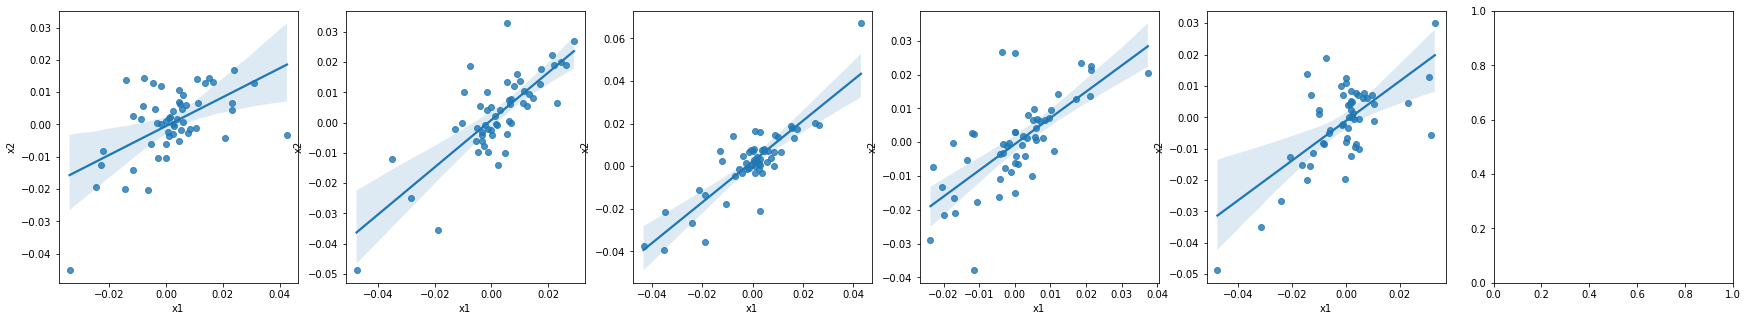

In [41]:
dataSampleTurkish = turkishStock_standarized.sample(frac=0.1)
print("turkishStock_standarized",turkishStock_standarized.size)
print("dataSampleTurkish",dataSampleTurkish.size)


# plt.show()
fig, axes = plt.subplots(1, 6, figsize=(30, 5))
# fig, axes = plt.subplots(1, 5, figsize=(15, 15), sharey=True)


for i in range (5):
    dataSampleTurkish = turkishStock.sample(frac=0.1)
    sns.regplot(ax= axes[i], data=dataSampleTurkish, x='x1', y='x2')
# sns.regplot(ax= axes[6], data=turkishStock, x='x1', y='x2')
plt.show()
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

<class 'numpy.ndarray'>
[110 110  93 110 175]
mtCarsData[' hp'] 32
mtCarsData[' weight'] 32


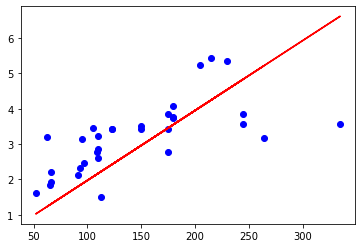

y = [0.01974371] x + 0


In [42]:
# print(mtCarsData[2:])
# print(mtCarsData.columns)

x = mtCarsData[" hp"].to_numpy()
y = mtCarsData[" weight"].to_numpy()


print(type(x))
np.append(x, [0])

# x=x.append([0],ignore_index = True)
# y=y.append([0],ignore_index = True)


print(x[:5])
print("mtCarsData[' hp']",x.size)
print("mtCarsData[' weight']",y.size)
# np.transpose(x)
# print(x.T)
# x = x.to_numpy()
# y= y.to_numpy()
x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, y, rcond=None)
plt.plot(x, y, 'bo')
plt.plot(x, a*x, 'r-')
# plt.xlim([0, 6])
# plt.ylim([0, 0.7])
plt.show()
print(f"y = {a} x + 0")